# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

**DO NOT DELETE THIS CELL**


## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa4.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment.If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.
9. Only Seaborn,numpy,pandas,sklearn,matplotlib packages will be allowed. Failing to abide will lead to a **-10 decrement in your scores.**
10. All visualizations (including scatter plots) should have at least 4-5 meaningful lines explaining about it. Failure to do so, will lead to reduction in marks.


In [ ]:

## https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html
## https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-1-centering-scaling-and-knn
## https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/
## https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
## https://pythonhealthcare.org/2018/12/22/112-splitting-data-set-into-training-and-test-sets-using-pandas-dataframes-methods/
## https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


You have 3 dataset files . 
You need to submit this ipython file after renaming it. 
Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [ ]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only


%matplotlib inline

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix


## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [ ]:
#########################begin code for Task 1-a
#Importing the dataset
df=pd.read_csv("CC GENERAL.csv")
    



In [ ]:
# printing first five records
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

## Check for the Dtype for Dataframe 

In [ ]:
# data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Check if the nan exist in Dataframe 

In [ ]:
# looking for missing vales
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We can see that MINIMUM_PAYMENT has 313 Null Values.

In [ ]:
# filling missing values
# Source : https://www.geeksforgeeks.org/how-to-fill-nan-values-with-mean-in-pandas/
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

## The nan in MINIMUM_PAYMENT is removed 

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## We are expecting numerical values 

In [ ]:
from sklearn.preprocessing import LabelEncoder
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
lencoder = LabelEncoder()
CUST_ID = lencoder.fit_transform(df.CUST_ID)
df["CUST_ID"]=CUST_ID

lencoder = LabelEncoder()
BALANCE = lencoder.fit_transform(df.CUST_ID)
df["BALANCE"]=BALANCE

lencoder = LabelEncoder()
BALANCE_FREQUENCY = lencoder.fit_transform(df.CUST_ID)
df["BALANCE_FREQUENCY"]=BALANCE_FREQUENCY

lencoder = LabelEncoder()
PURCHASES= lencoder.fit_transform(df.CUST_ID)
df["PURCHASES"]=PURCHASES

lencoder = LabelEncoder()
ONEOFF_PURCHASES= lencoder.fit_transform(df.CUST_ID)
df["ONEOFF_PURCHASES"]=ONEOFF_PURCHASES

lencoder = LabelEncoder()
INSTALLMENTS_PURCHASES= lencoder.fit_transform(df.CUST_ID)
df["INSTALLMENTS_PURCHASES"]=INSTALLMENTS_PURCHASES

lencoder = LabelEncoder()
CASH_ADVANCE= lencoder.fit_transform(df.CUST_ID)
df["CASH ADVANCE"]=CASH_ADVANCE


lencoder = LabelEncoder()
PURCHASES_FREQUENCY = lencoder.fit_transform(df.CUST_ID)
df["PURCHASES_FREQUENCY"]=PURCHASES_FREQUENCY

lencoder= LabelEncoder()
ONEOFF_PURCHASES_FREQUENCY = lencoder.fit_transform(df.CUST_ID)
df["ONEOFF_PURCHASES_FREQUENCY"]=ONEOFF_PURCHASES_FREQUENCY

lencoder = LabelEncoder()
PURCHASES_INSTALLMENTS_FREQUENCY = lencoder.fit_transform(df.CUST_ID)
df["PURCHASES_INSTALLEMTS_FREQUENCY"]=PURCHASES_INSTALLMENTS_FREQUENCY

lencoder = LabelEncoder()
CASH_ADVANCE_FREQUENCY= lencoder.fit_transform(df.CUST_ID)
df["CASH ADVANCE_FREQUENCY"]=CASH_ADVANCE_FREQUENCY

lencoder = LabelEncoder()
CASH_ADVANCE_TRX= lencoder.fit_transform(df.CUST_ID)
df["CASH ADVANCE_TRX"]=CASH_ADVANCE_TRX

lencoder = LabelEncoder()
PURCHASES_TRX= lencoder.fit_transform(df.CUST_ID)
df["PURCHASES_TRX"]=PURCHASES_TRX

lencoder = LabelEncoder()
CREDIT_LIMIT= lencoder.fit_transform(df.CUST_ID)
df["CREDIT_LIMIT"]=CREDIT_LIMIT


lencoder = LabelEncoder()
PAYMENTS= lencoder.fit_transform(df.CUST_ID)
df["PAYMENTS"]=PAYMENTS

lencoder = LabelEncoder()
MINIMUM_PAYMENTS= lencoder.fit_transform(df.CUST_ID)
df["MINIMUM_PAYMENTS"]=MINIMUM_PAYMENTS

lencoder = LabelEncoder()
PRC_FULL_PAYMENT= lencoder.fit_transform(df.CUST_ID)
df["PRC_FULL_PAYMENT"]=PRC_FULL_PAYMENT

lencoder = LabelEncoder()
TENURE= lencoder.fit_transform(df.CUST_ID)
df["TENURE"]=TENURE

In [ ]:
df.head(5)

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        0        0                  0          0                 0   
1        1        1                  1          1                 1   
2        2        2                  2          2                 2   
3        3        3                  3          3                 3   
4        4        4                  4          4                 4   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                       0      0.000000                    0   
1                       1   6442.945483                    1   
2                       2      0.000000                    2   
3                       3    205.788017                    3   
4                       4      0.000000                    4   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
0                           0                          0.083333  ...   
1                           1                          0.000000  ...   
2                           2                          0.000000  ...   
3                           3                          0.000000  ...   
4                           4                          0.000000  ...   

   PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
0              0             0         0                 0                 0   
1              1             1         1                 1                 1   
2              2             2         2                 2                 2   
3              3             3         3                 3                 3   
4              4             4         4                 4                 4   

   TENURE  CASH ADVANCE  PURCHASES_INSTALLEMTS_FREQUENCY  \
0       0             0                                0   
1       1             1                                1   
2       2             2                                2   
3       3             3                                3   
4       4             4                                4   

   CASH ADVANCE_FREQUENCY  CASH ADVANCE_TRX  
0                       0                 0  
1                       1                 1  
2                       2                 2  
3                       3                 3  
4                       4                 4  

[5 rows x 22 columns]

## For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k
- The k is from 1 to 10
- we can clearly see that x is at 3, graph clearly has an elbow
- After x=3, the graph starts to move parallel to the X-axis. So 3 is an optimal number of clusters

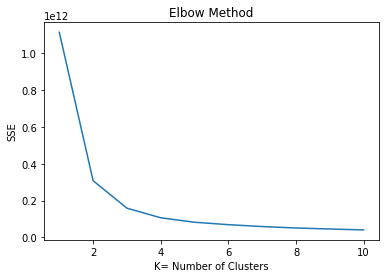

From the graph we can see that the best number of clusters for our analysis would be 3


In [ ]:
#########################begin code for Task 1-a

from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=2021)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,11), sse)
plt.title('Elbow Method')
plt.xlabel('K= Number of Clusters')
plt.ylabel('SSE')
plt.show()

#########################begin code for Task 1-a



print("From the graph we can see that the best number of clusters for our analysis would be 3")

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2,3,4 and visualize the predicted training samples and actual training samples on scatter plots. Use 80% of the dataset for training and 20% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



## Use 80% of the dataset for training and 20% of the dataset for testing 

In [ ]:
###################begin code for Task 1-b-1: Split the datasetand set the random_state as 2021 without fail

### Important!!!
X_train = df.sample(frac=0.80, random_state=2021) # We can also use train_test_split
X_test = df.drop(X_train.index)
y_train = X_train.pop('CREDIT_LIMIT')
y_test = X_test.pop('CREDIT_LIMIT')

###################end code for Task 1-b-1

## Principal Component Analysis 

## K = 2 predicted training labels vs actual training 

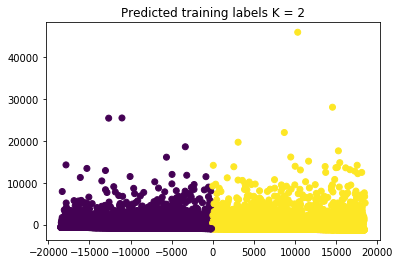

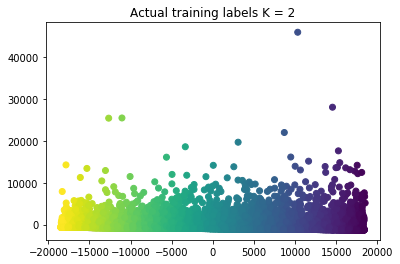

In [ ]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
kmeans = KMeans(n_clusters=2, random_state=2021).fit(X_train)

# Compute cluster centers and predict cluster index for each sample 
cluster_index_2=kmeans.predict(X_train)

# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
plt.title("Predicted training labels K = 2")
plt.scatter(x,y,c=cluster_index_2)
plt.show()
plt.title("Actual training labels K = 2")
plt.scatter(x,y,c=y_train)
plt.show()


## Visualize using K=2,3,4 as well

###################end code for Task 1-b-2


1. K means model with number of clusters=2 is trained.<br>
2. The dataset is of 17D to visulaize this dataset in 2D we are using dimensionality reduction technique called PCA.<br>
3. Using PCA 17D data is converted 2D for visualization.<br>
4. From the above predicted training labels we can see the two clusters are well separated.<br>
5. In the actual training labels the datapoints are overlapping.

## K = 3 predicted training labels vs actual training 

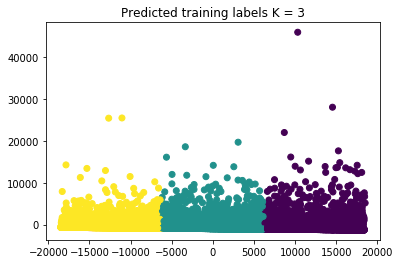

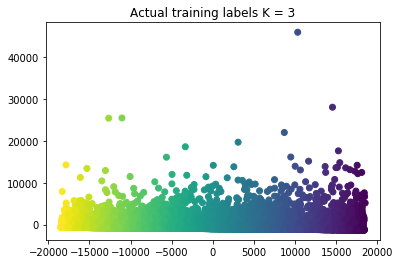

In [ ]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
kmeans = KMeans(n_clusters=3, random_state=2021).fit(X_train)

# Compute cluster centers and predict cluster index for each sample 
cluster_index_3=kmeans.predict(X_train)

# Model and fit the data to the PCA model
X_train_pca = None
X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
plt.title("Predicted training labels K = 3")
plt.scatter(x,y,c=cluster_index_3)
plt.show()
plt.title("Actual training labels K = 3")
plt.scatter(x,y,c=y_train)
plt.show()


## Visualize using K=2,3,4 as well

###################end code for Task 1-b-2


1. K means model with number of clusters=3 is trained and for train data the cluster numbers are predicted.<br>
2. The dataset is of 17D to visulaize this dataset in 2D we are using dimensionality reduction technique called PCA.<br>
3. Using PCA 17D data is converted 2D for visualization.<br>



## K = 4 predicted training labels vs actual training 

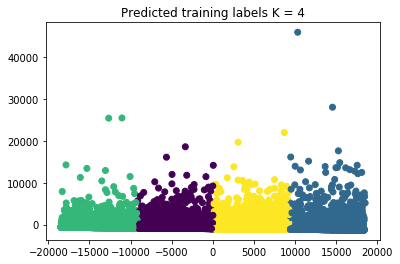

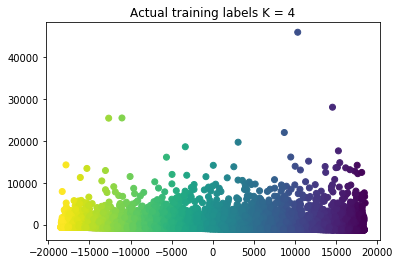

In [ ]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
kmeans = KMeans(n_clusters=4, random_state=2021).fit(X_train)

# Compute cluster centers and predict cluster index for each sample 
cluster_index_4=kmeans.predict(X_train)

# Model and fit the data to the PCA model
X_train_pca = None
X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
plt.title("Predicted training labels K = 4")
plt.scatter(x,y,c=cluster_index_4)
plt.show()
plt.title("Actual training labels K = 4")
plt.scatter(x,y,c=y_train)
plt.show()


## Visualize using K=2,3,4 as well


###################end code for Task 1-b-2


1. K means model with number of clusters=4 is trained and for train data the cluster index are predicted.<br>
2. The dataset is of 17D to visulaize this dataset in 2D we are using dimensionality reduction technique called PCA.<br>
3. Using PCA 17D data is converted 2D for visualization.<br>



Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

## K = 2 predicted testing labels vs actual testing 

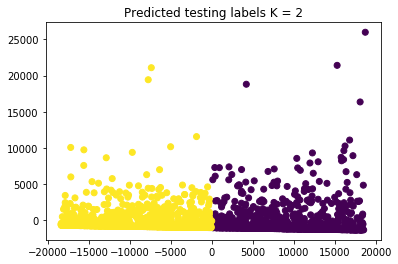

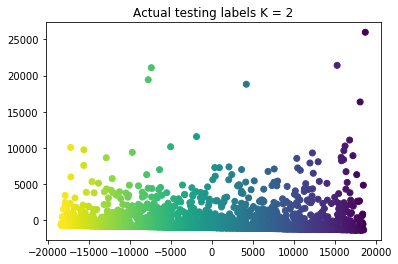

In [ ]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels

kmeans = KMeans(n_clusters=2, random_state=2021).fit(X_train)
# predict cluster index for each sample 
cluster_index2=kmeans.predict(X_test)

# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=2).fit_transform(X_test)


# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]
plt.title("Predicted testing labels K = 2")
plt.scatter(x,y,c=cluster_index2)
plt.show()
plt.title("Actual testing labels K = 2")
plt.scatter(x,y,c=y_test)
plt.show()





###################end code for Task 1-b-3

1. K means model with number of clusters=2 is trained and for test data the cluster numbers are predicted.<br>
2. The dataset is of 17D to visulaize this dataset in 2D we are using dimensionality reduction technique called PCA.<br>
3. Using PCA 17D data is converted 2D for visualization.<br>

## K = 3 predicted testing labels vs actual testing 

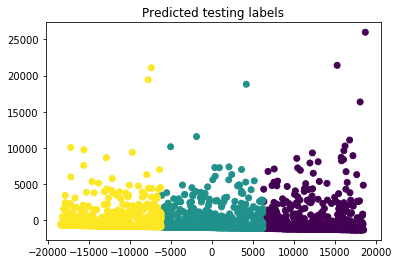

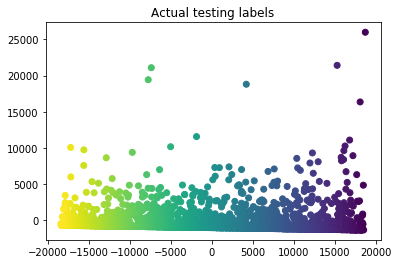

In [ ]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels

kmeans = KMeans(n_clusters=3, random_state=2021).fit(X_train)
# predict cluster index for each sample 
cluster_index3=kmeans.predict(X_test)

# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=2).fit_transform(X_test)


# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]
plt.title("Predicted testing labels")
plt.scatter(x,y,c=cluster_index3)
plt.show()
plt.title("Actual testing labels")
plt.scatter(x,y,c=y_test)
plt.show()





###################end code for Task 1-b-3

1. K means model with number of clusters=3 is trained and for test data the cluster index are predicted.<br>
2. The dataset is of 17D to visulaize this dataset in 2D we are using dimensionality reduction technique called PCA.<br>
3. Using PCA 17D data is converted 2D for visualization.<br>


## K = 4 predicted testing labels vs actual testing 

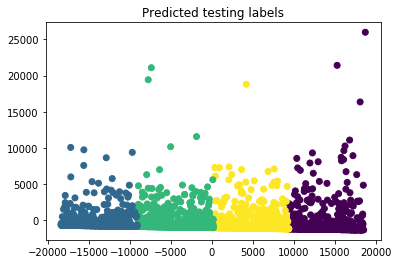

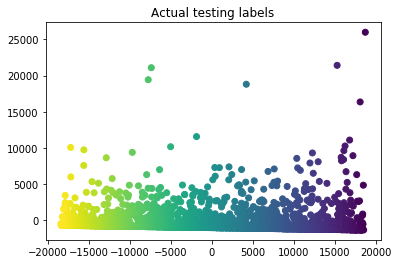

In [ ]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels

kmeans = KMeans(n_clusters=4, random_state=2021).fit(X_train)
# predict cluster index for each sample 
cluster_index4=kmeans.predict(X_test)

# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=2).fit_transform(X_test)


# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]
plt.title("Predicted testing labels")
plt.scatter(x,y,c=cluster_index4)
plt.show()
plt.title("Actual testing labels")
plt.scatter(x,y,c=y_test)
plt.show()





###################end code for Task 1-b-3

1. K means model with number of clusters=4 is trained and for test data the cluster index are predicted.<br>
2. The dataset is of 17D to visulaize this dataset in 2D we are using dimensionality reduction technique called PCA.<br>
3. Using PCA 17D data is converted 2D for visualization.<br>



In this step, you need to provide the evaluation of your clustering model. Print out a 2D confusion matrix.

## Confusion matrix for K = 2, 3, 4 

In [ ]:
###################begin code for Task 1-b-4: Print out a 2-D confusion matrix for all K values calculated above
print("Confusion Matrix for k=2")
print("Confusion matrix for training data \n",confusion_matrix(y_train,cluster_index_2))
print("Confusion matrix for testing data \n",confusion_matrix(y_test,cluster_index2))

print("Confusion Matrix for K=3")
print("Confusion matrix for training data \n",confusion_matrix(y_train,cluster_index_3))
print("Confusion matrix for testing data \n",confusion_matrix(y_test,cluster_index3))

print("Confusion Matrix for K=4")
print("Confusion matrix for training data \n",confusion_matrix(y_train,cluster_index_4))
print("Confusion matrix for testing data \n",confusion_matrix(y_test,cluster_index4))



###################end code for Task 1-b-4

Confusion Matrix for k=2
Confusion matrix for training data 
 [[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Confusion matrix for testing data 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Confusion Matrix for K=3
Confusion matrix for training data 
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
Confusion matrix for testing data 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
Confusion Matrix for K=4
Confusion matrix for training data 
 [[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
Confusion matrix for testing data 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 

# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [ ]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = X_train
cosine_distance = pairwise_distances(pdm_train,metric='cosine')
euclidean_distance = pairwise_distances(pdm_train,metric='euclidean')
manhattan_distance = pairwise_distances(pdm_train,metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine

cosine_complete = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_distance)
cosine_complete_f1 = f1_score(y_train,cosine_complete,average='weighted')


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean

euclidean_complete = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)
euclidean_complete_f1 = f1_score(y_train,euclidean_complete,average='weighted')


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan

manhattan_complete = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_distance)
manhattan_complete_f1 = f1_score(y_train,manhattan_complete,average='weighted')


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine

cosine_average = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)
cosine_average_f1 = f1_score(y_train,cosine_average,average='weighted')


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean

euclidean_average = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_distance)
euclidean_average_f1 = f1_score(y_train,euclidean_average,average='weighted')


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan

manhattan_average = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_distance)
manhattan_average_f1 = f1_score(y_train,manhattan_average,average='weighted')

## Print the 2-D confusion matrix with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. 

print("Confusion matrix  for complete linkage + cosine", confusion_matrix(y_train, cosine_complete))
print("Confusion matrix  for complete linkage + euclidean", confusion_matrix(y_train, euclidean_complete ))
print("Confusion matrix  for complete linkage + manhattan", confusion_matrix(y_train, manhattan_complete))
print("Confusion matrix  for average linkage + cosine", confusion_matrix(y_train, cosine_average))
print("Confusion matrix  for average linkage + euclidean", confusion_matrix(y_train, euclidean_average))
print("Confusion matrix  for average linkage + manhattan", confusion_matrix(y_train, manhattan_average))









print("F1-score for complete linkage + cosine", cosine_complete_f1)
print("F1-score for complete linkage + euclidean", euclidean_complete_f1)
print("F1-score for complete linkage + manhattan", manhattan_complete_f1)
print("F1-score for average linkage + cosine", cosine_average_f1)
print("F1-score for average linkage + euclidean", euclidean_average_f1)
print("F1-score for average linkage + manhattan", manhattan_average_f1)

###################end code for Task 2-a


Confusion matrix  for complete linkage + cosine [[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Confusion matrix  for complete linkage + euclidean [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Confusion matrix  for complete linkage + manhattan [[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Confusion matrix  for average linkage + cosine [[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Confusion matrix  for average linkage + euclidean [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Confusion matrix  for average linkage + manhattan [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0

## F1-score for complete linkage + manhattan 7.935500253936008e-08 

## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

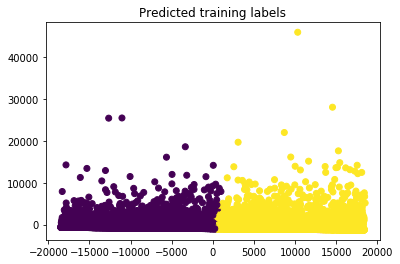

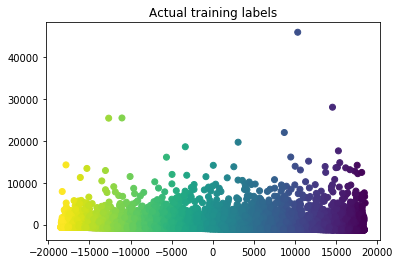

In [ ]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels

# In the above Task2a we can see that f1 score for complete linkage + manhattan is the highest
best_model = manhattan_complete

    
X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels versus actual training labels. 
x = X_train_pca[:,0]
y = X_train_pca[:,1]
plt.scatter(x,y,c=best_model)
plt.title("Predicted training labels")
plt.show()
plt.scatter(x,y,c=y_train)
plt.title("Actual training labels")
plt.show()







###################end code for Task 2-b

1. The F1-score for complete linkage manhattan is max hence we choose agglomerative model for no. of clusters=2 with complete linkage and affinity as manhattan distance.<br>
2. PCA is used to reduce the dimensiolity.<br>
3. Using PCA 17D data is reduced to 2D for better visualization.<br>


# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. Use number cluster = 2 for below example

F1-score for complete linkage + cosine 0.0
F1-score for complete linkage + euclidean 2.5001531343794805e-08
F1-score for complete linkage + manhattan 5.275346722163315e-08
F1-score for average linkage + cosine 0.0
F1-score for average linkage + euclidean 2.4968009737523798e-08
F1-score for average linkage + manhattan 6.162815420596746e-08


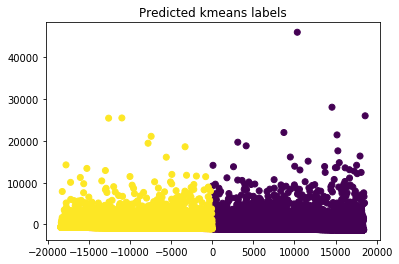

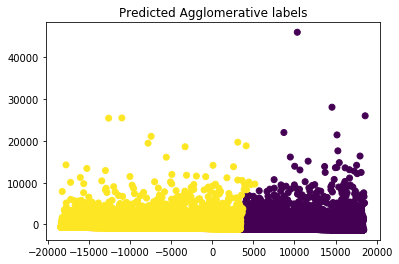

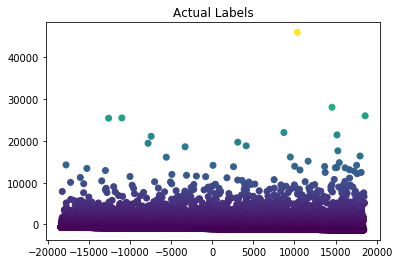

In [ ]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
# Storing the class label in y and remaining in x
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

kmeans_data = KMeans(n_clusters=2,random_state=2021)
kmeans_data_fit = kmeans_data.fit_predict(X)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X

cosine_distance = pairwise_distances(X,metric='cosine')
euclidean_distance = pairwise_distances(X,metric='euclidean')
manhattan_distance = pairwise_distances(X,metric='manhattan')



"""# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
# In the above Task2a we can see that f1 score for complete linkage + manhattan is the highest
best_model = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)"""
cosine_complete = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_distance)
cosine_complete_f1 = f1_score(y,cosine_complete,average='weighted')


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean

euclidean_complete = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)
euclidean_complete_f1 = f1_score(y,euclidean_complete,average='weighted')


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan

manhattan_complete = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_distance)
manhattan_complete_f1 = f1_score(y,manhattan_complete,average='weighted')


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine

cosine_average = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)
cosine_average_f1 = f1_score(y,cosine_average,average='weighted')


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean

euclidean_average = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_distance)
euclidean_average_f1 = f1_score(y,euclidean_average,average='weighted')


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan

manhattan_average = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_distance)
manhattan_average_f1 = f1_score(y,manhattan_average,average='weighted')




print("F1-score for complete linkage + cosine", cosine_complete_f1)
print("F1-score for complete linkage + euclidean", euclidean_complete_f1)
print("F1-score for complete linkage + manhattan", manhattan_complete_f1)
print("F1-score for average linkage + cosine", cosine_average_f1)
print("F1-score for average linkage + euclidean", euclidean_average_f1)
print("F1-score for average linkage + manhattan", manhattan_average_f1)

### Visualize Clusters
#  Model and fit the data to the PCA model

X_pca = PCA(n_components=2).fit_transform(X)
x = X_pca[:,0]
y = X_pca[:,1]



# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 

plt.scatter(x,y,c=kmeans_data_fit)
plt.title("Predicted kmeans labels")
plt.show()
plt.scatter(x,y,c=manhattan_average)
plt.title("Predicted Agglomerative labels")
plt.show()
plt.title("Actual Labels")
plt.scatter(x,y,c=y)#actual
plt.show()






###################end code for Task 3-a

## F1-score for average linkage + manhattan 6.162815420596746e-08 

1. When we trained Agglomerative clustering model using **80% of the data** we got highest F1-score for complete linkage + manhattan 7.935500253936008e-08.<br>
2. After training the Agglomerative clustering model with **entire dataset** we got the highest F1-score for average linkage + manhattan 6.162815420596746e-08.<br>
3. From the above predicted Kmeans labels, two clusters are separated well, but incase of predicted agglomerative labels, the far away points are clustered green.


## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out 2D confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model in at least 3-4 lines. Type your reasoning.

In [ ]:
###################begin code for Task 3-b
## Confusion Matrix for Kmeans.
# F1-score for linkage+mahnattan is highest hence this model as best model
best_model = manhattan_average

X = df[df.columns[:-1]]
y = df[df.columns[-1]]

print("Confusion matrix\n")
kmeans_conf = confusion_matrix(y,kmeans_data_fit)
agglo_conf = confusion_matrix(y,best_model)
print("Kmeans:")
print(kmeans_conf)
print("Agglomerative:")
print(agglo_conf)


print("\nPrecision\n")
kmeans_prec = precision_score(y,kmeans_data_fit,average='weighted')
agglo_prec = precision_score(y,best_model,average='weighted')
print("Kmeans:")
print(kmeans_prec)
print("Agglomerative:")
print(agglo_prec)


print("\nRecall\n")
kmeans_recall = recall_score(y,kmeans_data_fit,average='weighted')
agglo_recall = recall_score(y,best_model,average='weighted')
print("Kmeans:")
print(kmeans_recall)
print("Agglomerative:")
print(agglo_recall)


print("\nF1 Score\n")
kmeans_score = f1_score(y,kmeans_data_fit,average='weighted')
agglo_score = f1_score(y,best_model,average='weighted')
print("Kmeans:")
print(kmeans_score)
print("Agglomerative:")
print(agglo_score)







###################end code for Task 3-b

Confusion matrix

Kmeans:
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Agglomerative:
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]

Precision

Kmeans:
2.4934577901231643e-08
Agglomerative:
3.082257753804662e-08

Recall

Kmeans:
0.000111731843575419
Agglomerative:
0.000111731843575419

F1 Score

Kmeans:
4.985802926167738e-08
Agglomerative:
6.162815420596746e-08


C:\Users\navee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\navee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1. The F1 score for K means = 4.985802926167738e-08.<br>
2. The F1 score for Agglomerative clustering model is 6.162815420596746e-08.<br>
3. For this dataset with **entire datapoints**, the **Agglomerative model** is giving the better result compared to agglomerative clustering.<br>


## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[45 points] Task 1:</b>  

    [15 points] Task 1-a: Determine “k” value from the elbow method

    [30 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a 2D confusion matrix
    


<b>[50 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [15 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[10 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points